<a href="https://colab.research.google.com/github/NuttyLee22/Features_Influence_Pokemon_Legendary/blob/main/Pokemon_Legendary_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

**CSV File**

In [75]:
url = 'https://raw.githubusercontent.com/NuttyLee22/Features_Influence_Pokemon_Legendary/main/Pokemon.csv'

In [76]:
df = pd.read_csv(url)

In [77]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Replace False and True for 0 and 1**

In [78]:
df.replace({False:0,True:1},inplace=True)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [79]:
df.shape

(800, 13)

**Model training**

In [80]:
from pandas._libs.tslibs.conversion import precision_from_unit
X = df[['HP','Attack','Defense','Speed']]
y = df.Legendary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2811)

print('Set de treino:', X_train.shape, y_train.shape)
print('Set de teste:', X_test.shape, y_test.shape)

Set de treino: (640, 4) (640,)
Set de teste: (160, 4) (160,)


Instantiating the Random Forest Algorithm

In [81]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
rfc_predict = rfc.predict(X_test)

**Model Metrics**

In [83]:
print('Recall do modelo:', metrics.recall_score(y_test, rfc_predict, average=None)*100)
print('F1 do modelo:', metrics.f1_score(y_test, rfc_predict, average=None)*100)

Recall do modelo: [97.33333333 90.        ]
F1 do modelo: [98.31649832 78.26086957]


**Function that shows the feature importances in the model**

In [84]:
def features_importances(modelo, X, y):
  viz = FeatureImportances(modelo)
  viz.fit(X, y)
  viz.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


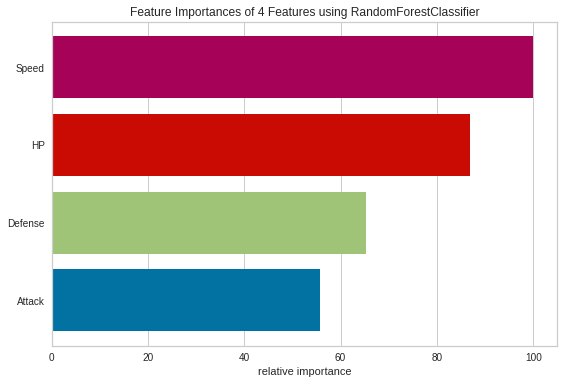

In [85]:
features_importances(rfc,X_train,y_train) 